# Erick José Pineda Amézquita  -   17012140


==========================================================================================================================

# Red neuronal prealimentada o Feed Forward Network

Problema a analizar: **Cáncer de mama**  
Fuente de datos: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)  
![Titulo](img/i0.JPG)



El set de datos cuenta con lo siguiente:

- Campo de predicción 2: diagnóstico: B = benigno, M = maligno
- Los datos son linealmente separables utilizando las 30 funciones de entrada.  


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen características de los núcleos celulares presentes en la imagen. Algunas de las imágenes se pueden encontrar en:  
http://pages.cs.wisc.edu/~street/images/  




**Importamos paquetes**

In [1]:
##Librerias básicas:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import loadtxt

Se importan las librerías que servirán para procesamiento paralelo como TensorFlow y Keras

In [19]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [3]:
from tensorflow.python.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

El acceso se puede realizar por medio de ftp o bien, por medio de Sklearn.

In [4]:
import sklearn.datasets
breast_cancer = sklearn.datasets.load_breast_cancer()

In [5]:
type(breast_cancer)

sklearn.utils.Bunch

In [6]:
X = breast_cancer.data
Y = breast_cancer.target

**Explorando los datos del dataset**

In [7]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['Class'] = breast_cancer.target
data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


Análisis estadístico

In [8]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Conteo de las posibles clases

In [9]:
print(data['Class'].value_counts())

1    357
0    212
Name: Class, dtype: int64


Tipos de cáncer de mama

In [10]:
print(breast_cancer.target_names)

['malignant' 'benign']


**Analisis de todas las variables con cada clase**

In [11]:
data.groupby('Class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### División del dataset para el entrenamiento y para el testing

In [12]:
from   sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)


In [13]:
print("")
print("=========== Set de datos para entrenamiento: =========== ")
print(X_train.shape)
print(Y_train.shape)
print("")
print("=========== Set de datos para testing =========== ")
print(X_test.shape)
print(Y_test.shape) 
print("")


=========== Set de datos para entrenamiento: =========== 
(512, 30)
(512,)

=========== Set de datos para testing =========== 
(57, 30)
(57,)



# Programando y evaluando el modelo

Creación de las capas de entrada, internas y la salida.   
Observar que se utiliza Dropout y las respectivas funciones de activación recomendadas.

In [14]:
from   sklearn.metrics import precision_score
from   sklearn.metrics import recall_score
from   sklearn.metrics import f1_score

model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
snn = model.fit(x=X_train, y=Y_train, batch_size=10, epochs=150, verbose=1, validation_data=(X_test, Y_test), shuffle=True)  
_, accuracy = model.evaluate(X_test,Y_test)
pred = model.predict_classes(X_test)


W0918 22:42:50.174831 17892 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:1666: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 512 samples, validate on 57 samples
Epoch 1/150
512/512 [==============================] - 0s 134us/sample - loss: 87.2339 - acc: 0.5352 - val_loss: 6.4380 - val_acc: 0.3684
Epoch 2/150
512/512 [==============================] - 0s 91us/sample - loss: 49.1116 - acc: 0.4961 - val_loss: 8.8654 - val_acc: 0.3684
Epoch 3/150
512/512 [==============================] - 0s 91us/sample - loss: 32.9937 - acc: 0.5215 - val_loss: 2.4136 - val_acc: 0.4035
Epoch 4/150
512/512 [==============================] - 0s 83us/sample - loss: 25.4250 - acc: 0.5391 - val_loss: 2.9255 - val_acc: 0.4386
Epoch 5/150
512/512 [==============================] - 0s 88us/sample - loss: 24.5331 - acc: 0.5723 - val_loss: 6.8897 - val_acc: 0.3684
Epoch 6/150
512/512 [==============================] - 0s 88us/sample - loss: 19.5723 - acc: 0.5410 - val_loss: 1.4587 - val_acc: 0.6667
Epoch 7/150
512/512 [==============================] - 0s 85us/sample - loss: 12.3595 - acc: 0.6152 - val_loss: 2.3416 - val_acc: 0.

512/512 [==============================] - 0s 88us/sample - loss: 0.4159 - acc: 0.8047 - val_loss: 0.2361 - val_acc: 0.9298
Epoch 61/150
512/512 [==============================] - 0s 82us/sample - loss: 0.4298 - acc: 0.8027 - val_loss: 0.2362 - val_acc: 0.9298
Epoch 62/150
512/512 [==============================] - 0s 84us/sample - loss: 0.4018 - acc: 0.8301 - val_loss: 0.2752 - val_acc: 0.9298
Epoch 63/150
512/512 [==============================] - 0s 82us/sample - loss: 0.4138 - acc: 0.8223 - val_loss: 0.2268 - val_acc: 0.9123
Epoch 64/150
512/512 [==============================] - 0s 83us/sample - loss: 0.3966 - acc: 0.8379 - val_loss: 0.2036 - val_acc: 0.9298
Epoch 65/150
512/512 [==============================] - 0s 79us/sample - loss: 0.4462 - acc: 0.7930 - val_loss: 0.2372 - val_acc: 0.9298
Epoch 66/150
512/512 [==============================] - 0s 77us/sample - loss: 0.3967 - acc: 0.8047 - val_loss: 0.2371 - val_acc: 0.9123
Epoch 67/150
512/512 [==============================] 

Epoch 120/150
512/512 [==============================] - 0s 79us/sample - loss: 0.3883 - acc: 0.8086 - val_loss: 0.2114 - val_acc: 0.9298
Epoch 121/150
512/512 [==============================] - 0s 80us/sample - loss: 0.3958 - acc: 0.8164 - val_loss: 0.1887 - val_acc: 0.9123
Epoch 122/150
512/512 [==============================] - 0s 77us/sample - loss: 0.4102 - acc: 0.7910 - val_loss: 0.1839 - val_acc: 0.9474
Epoch 123/150
512/512 [==============================] - 0s 81us/sample - loss: 0.3721 - acc: 0.8281 - val_loss: 0.2109 - val_acc: 0.9298
Epoch 124/150
512/512 [==============================] - 0s 78us/sample - loss: 0.3841 - acc: 0.8027 - val_loss: 0.2140 - val_acc: 0.9123
Epoch 125/150
512/512 [==============================] - 0s 84us/sample - loss: 0.3968 - acc: 0.7949 - val_loss: 0.2066 - val_acc: 0.9298
Epoch 126/150
512/512 [==============================] - 0s 78us/sample - loss: 0.3805 - acc: 0.8281 - val_loss: 0.2113 - val_acc: 0.9474
Epoch 127/150
512/512 [===========

W0918 22:42:57.314875 17892 deprecation.py:323] From <ipython-input-14-b97c853e09ab>:15: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


## Analizando los resultados del modelo entrenado 
**F1Score  
Presicion  
Recall**

In [15]:
precision = precision_score(Y_test,pred)
recall = recall_score(Y_test,pred)
f1 = f1_score(Y_test,pred)
print('F1 score: %.2f' % (f1))
print('Precision: %.2f' % (precision))
print('Recall: %.2f' % (recall))

F1 score: 0.96
Precision: 0.95
Recall: 0.97


## Capas del modelo

In [16]:
result = [pd.DataFrame({'F1 score':f1,'Precision':precision,'Recall':recall, 'Accuracy':accuracy},index=np.array([1])),model.summary()]
result

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                372       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


[   F1 score  Precision    Recall  Accuracy
 1  0.958904   0.945946  0.972222  0.947368, None]

## Graficas de resultados

Graficas del modelo

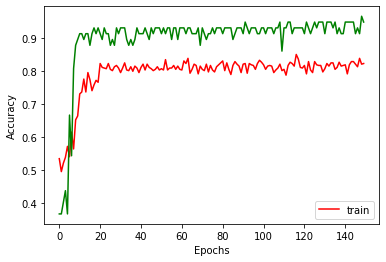

In [17]:
plt.figure(0)  
plt.plot(snn.history['acc'],'r')  
plt.plot(snn.history['val_acc'],'g')   
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Epochs")  
plt.ylabel("Accuracy")   
plt.legend(['train'])


Gráficas del entrenamiento


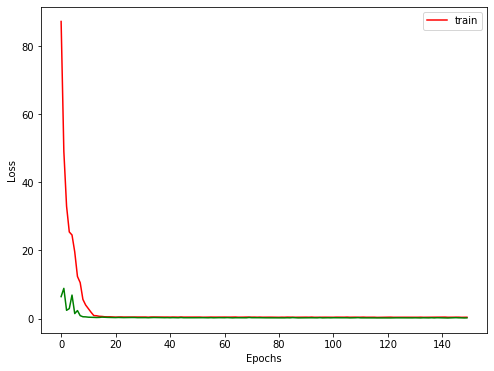

In [18]:
plt.figure(1)  
plt.plot(snn.history['loss'],'r')  
plt.plot(snn.history['val_loss'],'g')    
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Epochs")  
plt.ylabel("Loss")   
plt.legend(['train'])

plt.show() 

# Conclusiones

Después de realizar el entrenamiento del modelo se puede concluir lo siguiente:  

    * Se logra observar cómo el error se va reduciendo en cada epoch, ver sección de "Programando y evaluando el modelo"
    * Se utilizó de entrada 12 neuronas con varias capas intermedias. 
    * La grafica de error anterior muestra cómo a través del tiempo el modelo va aprendiendo y se va perfeccionando. 
    * Los datos reales con los del modelo son bastante parecidos, con eso se confirma fácilmente con los siguientes resultados:
        * F1 Score de: 0.96, bastante alto
        * Precision de: 0.92, valor bastante aceptable
        * Accuracy de: 0.947, le agrega buena exactitud al modelo.
        
    * Según lo anterior, se concluye que el modelo utilizando redes neuronales es ampliamente aceptable. 
        

